# Árboles de Decisión

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv

En este conjunto de datos encontrarás las siguientes variables:
* Pregnancies. Número de embarazos del paciente (numérico)
* Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
* BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
* SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
* Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
* BMI. Índice de masa corporal (numérico)
* DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
* Age. Edad del paciente (numérico)
* Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)


## EDA

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

print("Shape: ", df.shape)
df.head(5).T

Shape:  (768, 9)


,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [5]:
# Parece ser que todos nuestros datos son numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Como todas son numéricas primero queremos saber si entre sí están muy correlacionadas
variables = df.drop(['Outcome'], axis = 1)
objective = df['Outcome']

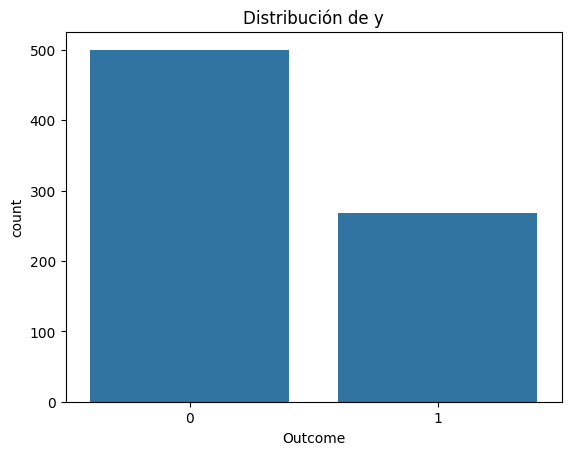

In [10]:
# Veamos qué tan distribuída está nuestra variable y - Outcome
objective.value_counts(normalize=True).rename('proportion')
sns.countplot(x=objective, data = variables)
plt.title("Distribución de y")
plt.show()

In [12]:
# No están tan desbalanceadas como en el ejercicio de mi primer modelo de ML
cols = variables.columns

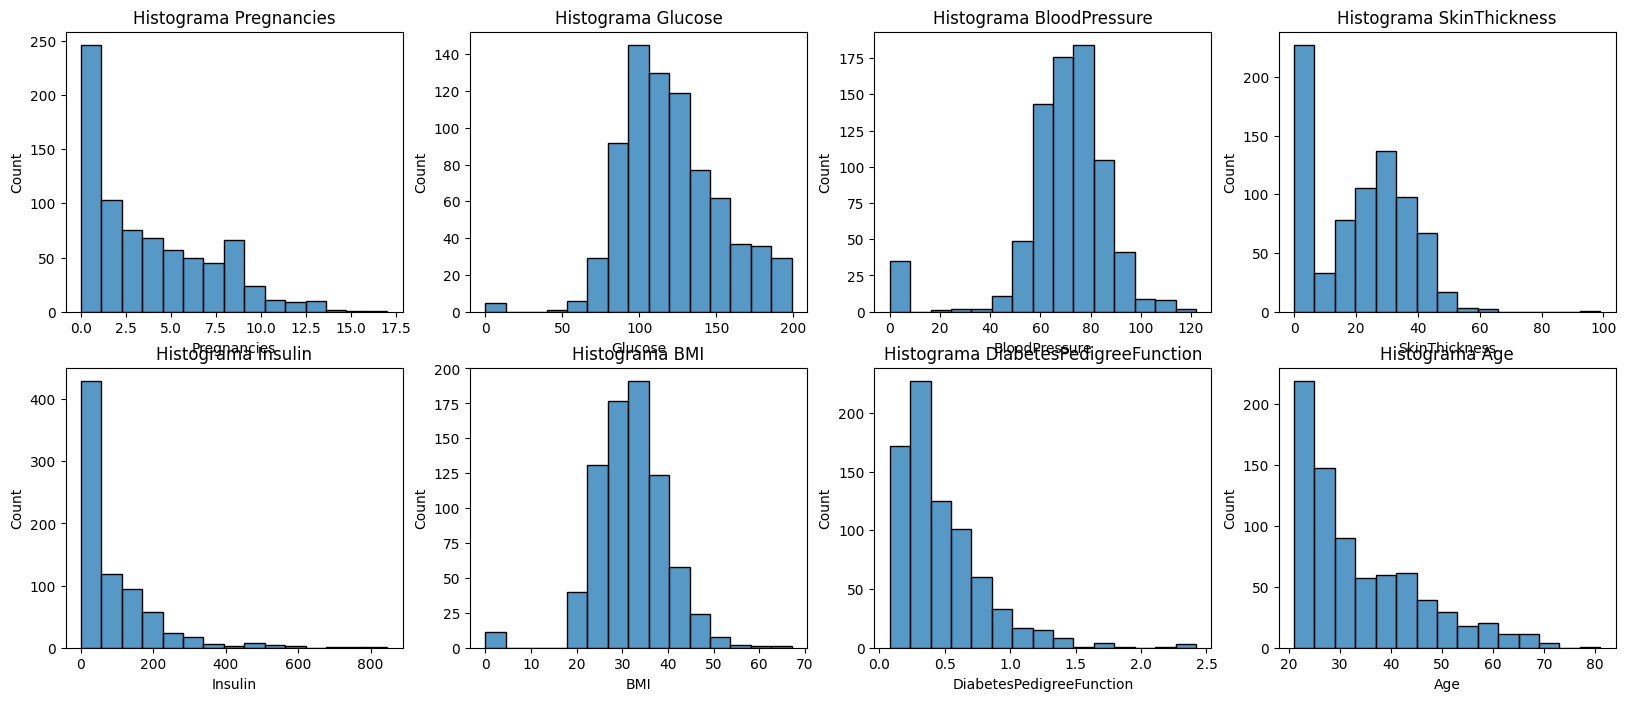

In [14]:
fig, axes = plt.subplots(2, 4, figsize = (20,8))
axes = axes.flatten()

for i, c in enumerate(cols):
    sns.histplot(variables[c].dropna(), bins = 15, ax = axes[i])
    axes[i].set_title(f"Histograma {c}")

### Relación bivariada con la variable objetivo

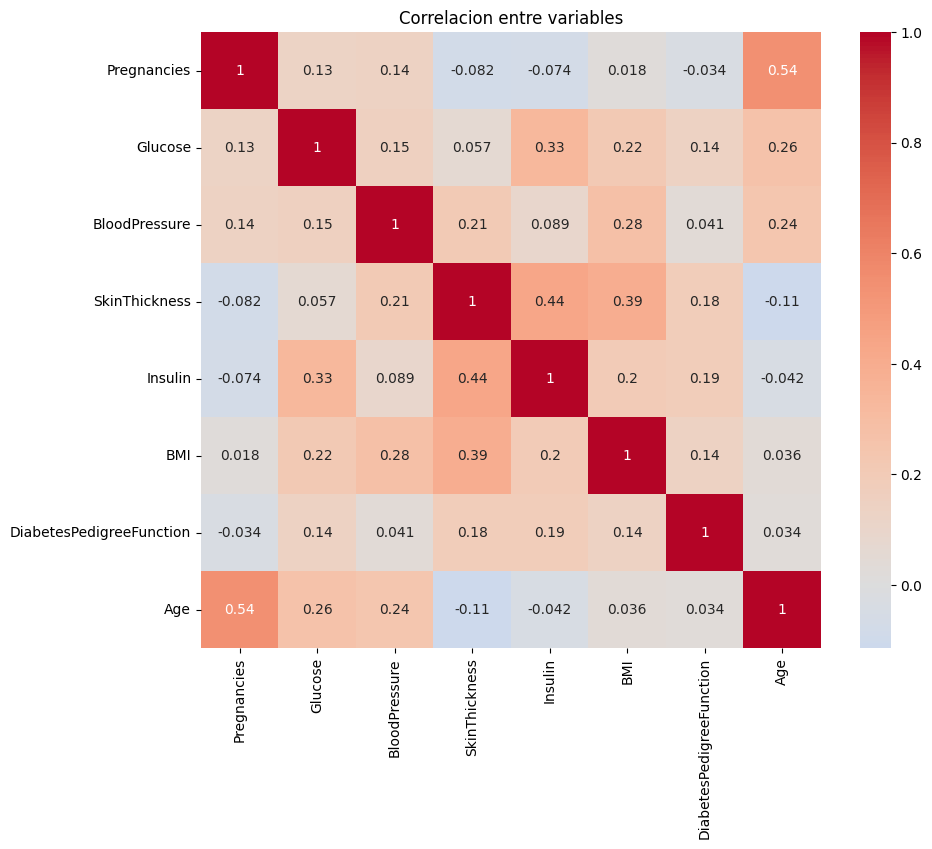

In [19]:
corr = variables.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="coolwarm", center=0)
plt.title("Correlacion entre variables")
plt.show()

In [20]:
# ninguna es mayor al 75% entonces por el momento no eliminaré ninguna
# Numéricas -> Tasa por cuantiles
def rate_by_quantiles(col, q=5):
    bins=pd.qcut(df[col], q=q, duplicates='drop')
    return (df.groupby(bins)['Outcome']
            .apply(lambda s: (s==1).mean())
            .sort_values(ascending=False))

# cada print corresponde a un intervalo de la variable
# el valor es la proporción de 'yes' en ese intervalo
for c in cols:
    print(c)
    display(rate_by_quantiles(c))


Pregnancies


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Pregnancies
(7.0, 17.0]      0.564516
(4.0, 7.0]       0.407895
(2.0, 4.0]       0.349650
(-0.001, 1.0]    0.272358
(1.0, 2.0]       0.184466
Name: Outcome, dtype: float64

Glucose


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Glucose
(147.0, 199.0]    0.743243
(125.0, 147.0]    0.442953
(109.0, 125.0]    0.305732
(95.0, 109.0]     0.194805
(-0.001, 95.0]    0.087500
Name: Outcome, dtype: float64

BloodPressure


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


BloodPressure
(82.0, 122.0]     0.474074
(74.0, 82.0]      0.382716
(68.0, 74.0]      0.366013
(60.0, 68.0]      0.293750
(-0.001, 60.0]    0.246835
Name: Outcome, dtype: float64

SkinThickness


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


SkinThickness
(35.0, 99.0]      0.468966
(27.0, 35.0]      0.388535
(-0.001, 18.0]    0.312500
(18.0, 27.0]      0.267123
Name: Outcome, dtype: float64

Insulin


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Insulin
(150.0, 846.0]    0.516340
(-0.001, 72.2]    0.314534
(72.2, 150.0]     0.285714
Name: Outcome, dtype: float64

BMI


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


BMI
(37.8, 67.1]      0.513158
(30.1, 33.7]      0.450331
(33.7, 37.8]      0.431373
(25.9, 30.1]      0.267516
(-0.001, 25.9]    0.090323
Name: Outcome, dtype: float64

DiabetesPedigreeFunction


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


DiabetesPedigreeFunction
(0.687, 2.42]     0.496732
(0.454, 0.687]    0.363636
(0.303, 0.454]    0.337662
(0.219, 0.303]    0.326797
(0.077, 0.219]    0.220779
Name: Outcome, dtype: float64

Age


/tmp/ipykernel_8646/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Age
(42.6, 81.0]      0.532468
(33.0, 42.6]      0.457143
(27.0, 33.0]      0.429577
(23.0, 27.0]      0.238994
(20.999, 23.0]    0.132948
Name: Outcome, dtype: float64

Con lo obtenido en el EDA creo que todas las variables son una buena selección para entrenar al modelo.

In [22]:
from sklearn.model_selection import train_test_split

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(variables, objective, test_size=0.2, random_state=123)

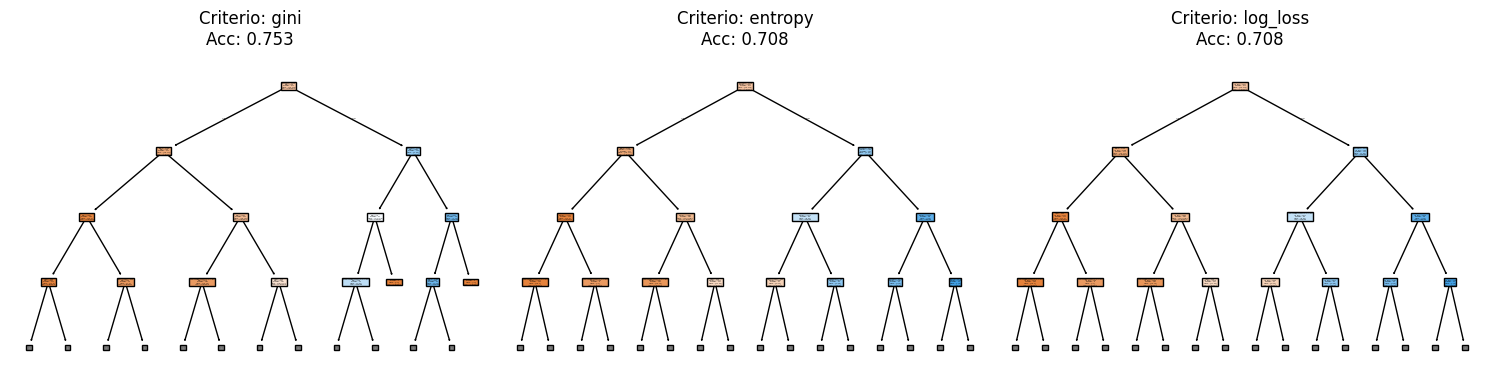

Resultados de cada criterio: {'gini': 0.7532467532467533, 'entropy': 0.7077922077922078, 'log_loss': 0.7077922077922078}


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# probar distintos criterios de pureza
criterios = ["gini", "entropy", "log_loss"]
resultados = {}

plt.figure(figsize=(15, 4))
for i, criterio in enumerate(criterios, 1):
    model = DecisionTreeClassifier(criterion=criterio, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados[criterio] = acc

    plt.subplot(1, 3, i)
    plot_tree(
        model, feature_names=variables.columns,
        class_names=["No Diabetes", "Diabetes"],
        filled=True, max_depth=3
    )
    plt.title(f"Criterio: {criterio}\nAcc: {acc:.3f}")

plt.tight_layout()
plt.show()

print("Resultados de cada criterio:", resultados)

In [29]:
# optimizar el mejor criterio
mejor_criterio = max(resultados, key=resultados.get)
print(f"Mejor criterio: {mejor_criterio}")

Mejor criterio: gini


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(criterion=mejor_criterio, random_state=123),
    param_grid,
    scoring="accuracy",
    cv=5
)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...dom_state=123)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [31]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report

print("Mejor modelo:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred_best))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_best))

Mejor modelo: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Accuracy: 0.7467532467532467

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



In [35]:
import joblib

# guardamos el modelo
joblib.dump(best_model, "decision_tree_diabetes.pkl")
print("\nModelo guardado como 'decision_tree_diabetes.pkl'")


Modelo guardado como 'decision_tree_diabetes.pkl'
